In [47]:
#Part B TL and VGG16
train_dir = 'dogs-vs-cat-small/train/'
test_dir = 'dogs-vs-cat-small/test/'
validation_dir ='dogs-vs-cat-small/validation/'


from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [48]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i+=1
        if i * batch_size >= sample_count:
            break
        return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))



In [5]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4* 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 3s 31ms/step - loss: 0.6937 - acc: 0.9825 - val_loss: 0.6886 - val_acc: 0.9930
Epoch 2/30
100/100 [==============================] - 3s 30ms/step - loss: 0.6886 - acc: 0.9945 - val_loss: 0.6830 - val_acc: 0.9930
Epoch 3/30
100/100 [==============================] - 3s 30ms/step - loss: 0.6803 - acc: 0.9955 - val_loss: 0.6769 - val_acc: 0.9950
Epoch 4/30
100/100 [==============================] - 3s 32ms/step - loss: 0.6742 - acc: 0.9970 - val_loss: 0.6697 - val_acc: 0.9940
Epoch 5/30
100/100 [==============================] - 3s 29ms/step - loss: 0.6667 - acc: 0.9960 - val_loss: 0.6625 - val_acc: 0.9930
Epoch 6/30
100/100 [==============================] - 3s 30ms/step - loss: 0.6592 - acc: 0.9975 - val_loss: 0.6548 - val_acc: 0.9960
Epoch 7/30
100/100 [==============================] - 3s 34ms/step - loss: 0.6501 - acc: 0.9985 - val_loss: 0.6474 - val_acc: 0.9950
Epoch 8/30
100/100 [==============================] - 3s 35ms/step - 

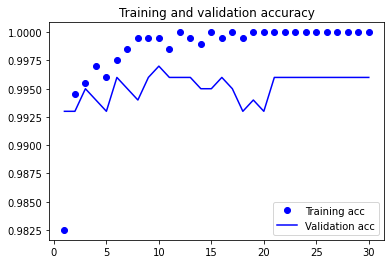

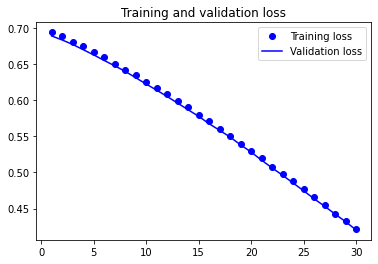

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()